../TangentForceTests/config3_v10_t1.csv
c:/Users/motiongenesis/Documents/5-17-24_screwshell_tangentforce_tests\test1.csv
Max Motor Torque =  32.43603515625
Settling Motor Torque =  32.24267578125
Max Sensor Force y 40.00735
Max Sensor Force x 6.118707
Max Sensor Force =  40.472541671784704
Settling Sensor Force =  39.95117320178982


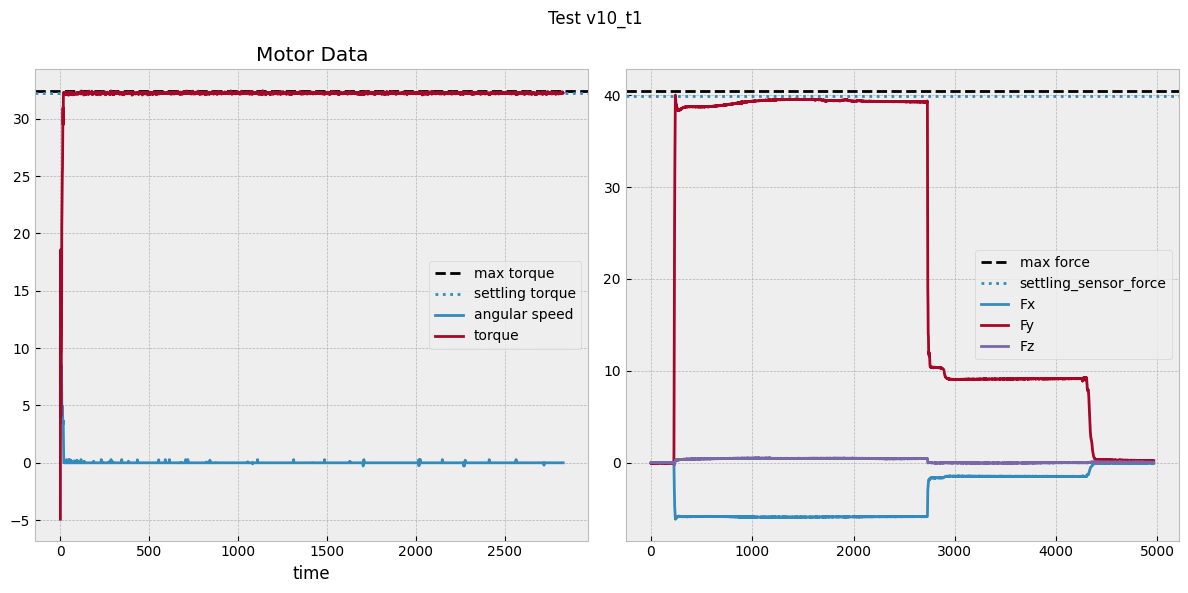

../TangentForceTests/config3_v20_t2.csv
c:/Users/motiongenesis/Documents/5-17-24_screwshell_tangentforce_tests\test2.csv
Max Motor Torque =  32.4521484375
Settling Motor Torque =  32.1943359375
Max Sensor Force y 45.08919
Max Sensor Force x 7.703785
Max Sensor Force =  45.742577082870234
Settling Sensor Force =  41.65016617379307


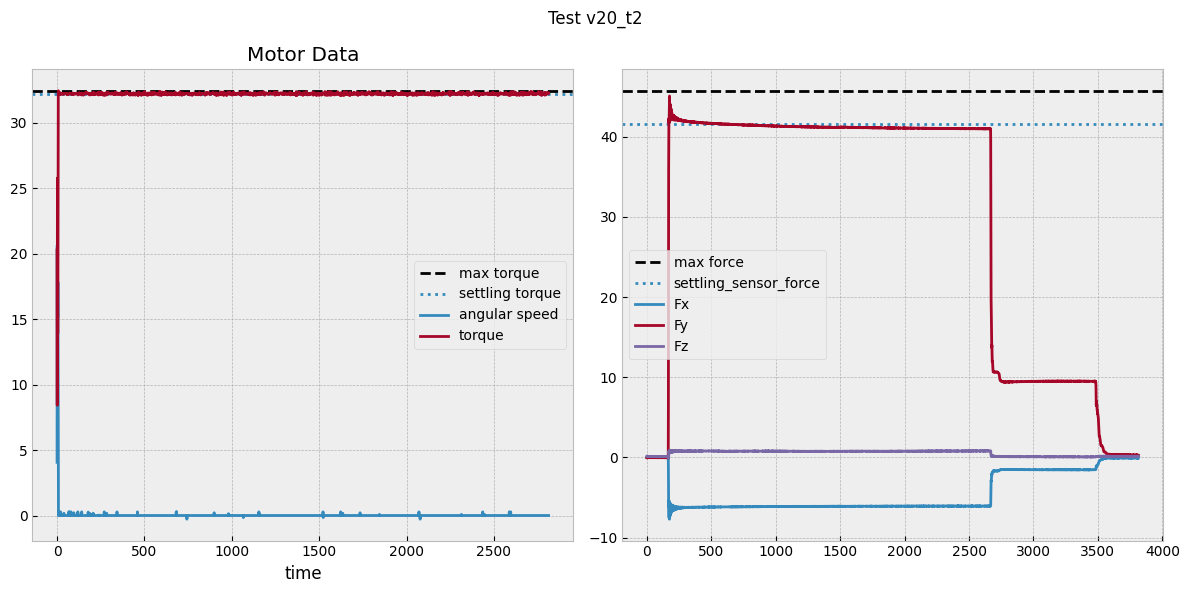

../TangentForceTests/config3_v40_t3.csv
c:/Users/motiongenesis/Documents/5-17-24_screwshell_tangentforce_tests\test3.csv
Max Motor Torque =  33.322265625
Settling Motor Torque =  32.2265625
Max Sensor Force y 65.22995
Max Sensor Force x 10.17284
Max Sensor Force =  66.01842962891574
Settling Sensor Force =  42.203706002756725


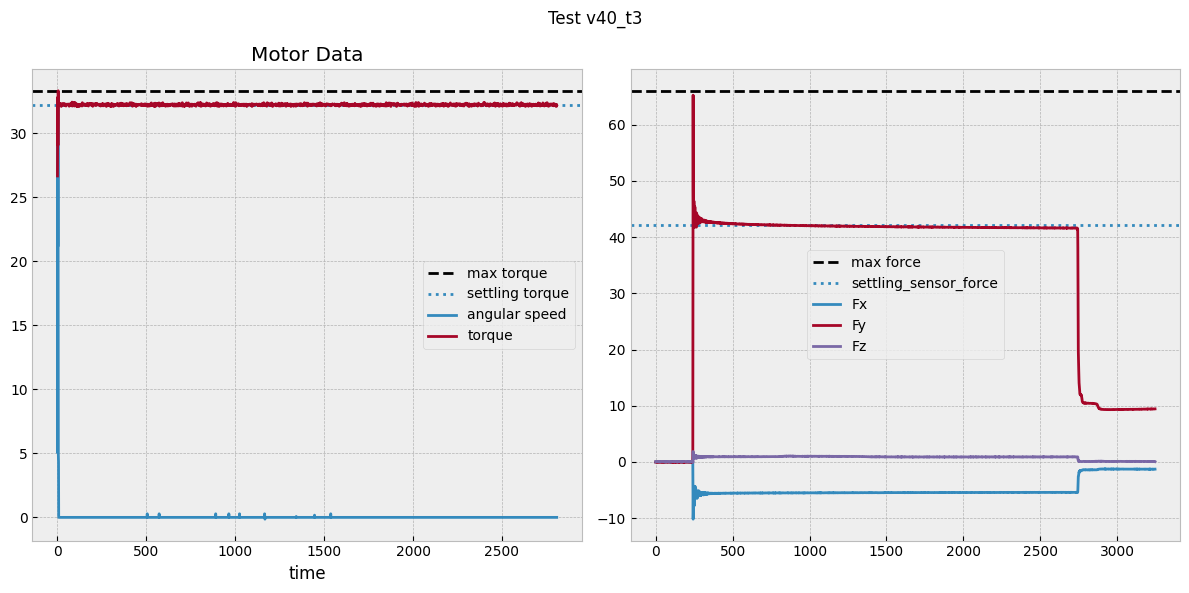

../TangentForceTests/config3_v50_t4.csv
c:/Users/motiongenesis/Documents/5-17-24_screwshell_tangentforce_tests\test4.csv
Max Motor Torque =  33.43505859375
Settling Motor Torque =  32.37158203125
Max Sensor Force y 75.92719
Max Sensor Force x 10.9677
Max Sensor Force =  76.71524375628418
Settling Sensor Force =  60.69429613067203


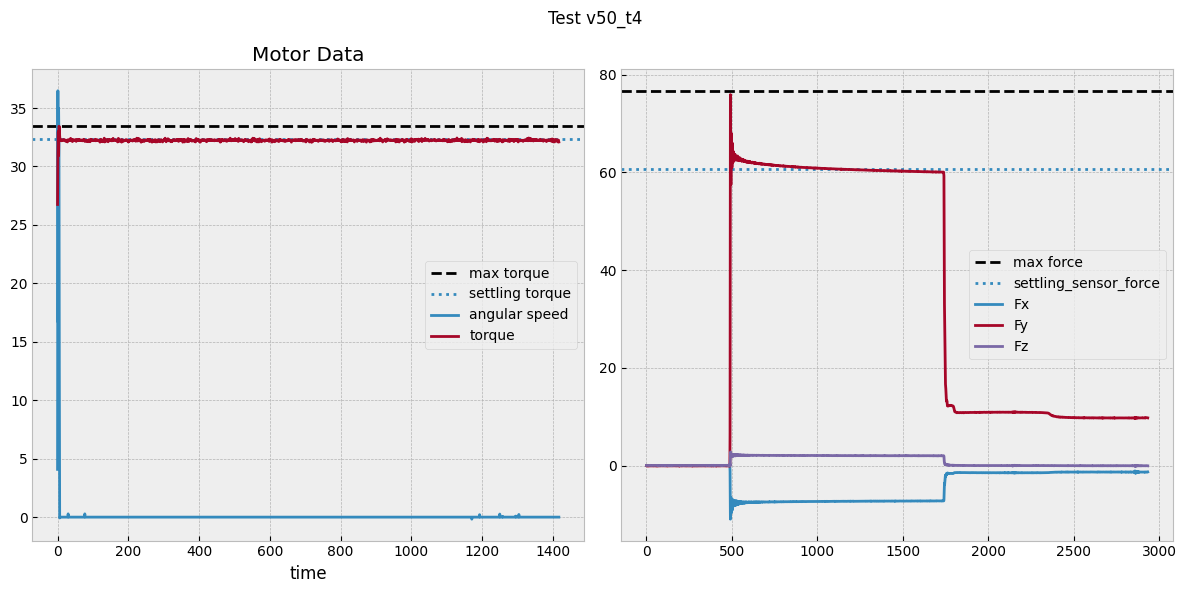

In [25]:
### Read in motor data
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('bmh')

screw_shell_radius = 


motor_data = []
ft_data = []
motor_data_folder = "../TangentForceTests/"
# ft_data_folder = "C:/Users/jlimk/Documents/5-17-24_screwshell_tangentforce_tests_ft_data"
ft_data_folder = "c:/Users/motiongenesis/Documents/5-17-24_screwshell_tangentforce_tests"
motor_file_suffixes = ["v10_t1", "v20_t2", "v40_t3", "v50_t4"]
for i in range(4):
    motor_data_filename = os.path.join(motor_data_folder, f"config3_{motor_file_suffixes[i]}.csv")
    ft_data_filename = os.path.join(ft_data_folder, f"test{i+1}.csv")
    print(motor_data_filename)
    print(ft_data_filename)
    cur_motor_data = pd.read_csv(motor_data_filename)
    cur_ft_data = pd.read_csv(ft_data_filename, skiprows=list(range(6)))
    motor_data.append(cur_motor_data)
    ft_data.append(cur_ft_data)

    max_motor_torque = cur_motor_data["torque"].abs().max()
    settling_motor_torque = cur_motor_data["torque"][1000]
    max_sensor_force = np.linalg.norm([cur_ft_data[" Fx "].abs().max(), cur_ft_data[" Fy "].abs().max()])
    settling_sensor_force = np.linalg.norm([cur_ft_data[" Fx "].abs()[1500], cur_ft_data[" Fy "].abs()[1500]])

    print("Max Motor Torque = ", max_motor_torque)
    print("Settling Motor Torque = ", settling_motor_torque)
    # print("Max Sensor Force y", cur_ft_data[" Fy "].max())
    # print("Max Sensor Force x", cur_ft_data[" Fx "].abs().max())
    print("Max Sensor Force = ", max_sensor_force)
    print("Settling Sensor Force = ", settling_sensor_force)

    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    fig.suptitle(f"Test {motor_file_suffixes[i]}")

    axes[0].set_title("Motor Data")
    axes[0].axhline(max_motor_torque, linestyle = '--', color = 'black', label="max torque")
    axes[0].axhline(settling_motor_torque, linestyle = ':', label="settling torque")
    axes[0].plot(cur_motor_data["angular speed"], label="angular speed")
    axes[0].plot(cur_motor_data["torque"], label="torque")
    # axes[0].axhline(max_motor_torque)
    axes[0].legend()
    axes[0].set_xlabel("time")

    axes[1].axhline(max_sensor_force, linestyle = '--', color = 'black', label="max force")
    axes[1].axhline(settling_sensor_force, linestyle = ':', label="settling_sensor_force")
    axes[1].plot(cur_ft_data[' Fx '], label="Fx")
    axes[1].plot(cur_ft_data[' Fy '], label="Fy")
    axes[1].plot(cur_ft_data[' Fz '], label="Fz")
    # axes[1].axhline(max_sensor_torque)
    axes[1].legend()

    plt.tight_layout()
    plt.show()

    # measured_torque_constant = max_sensor_torque / max_motor_torque
    # print(f"Max Motor Torque = {max_motor_torque}")
    # print(f"Max Sensor Torque = {max_sensor_torque}")
    # print(f"Torque Constant = {measured_torque_constant}")
